In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shrayanac","key":"9af0398cbf32d5f7c8e0dafdb13ae06f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle
print(kaggle.api.dataset_list_files('marquis03/high-resolution-viton-zalando-dataset').files)
kaggle.api.dataset_download_files('marquis03/high-resolution-viton-zalando-dataset',path='.',unzip=True)
kaggle.api.dataset_metadata('marquis03/high-resolution-viton-zalando-dataset',path='.')
datasets=kaggle.api.dataset_list(search='high-resolution-viton-zalando-dataset')
print(datasets)

[{"ref": "", "datasetRef": "", "ownerRef": "", "name": "test/agnostic-v3.2/00006_00.jpg", "creationDate": "2023-10-13T12:05:00.316Z", "description": "", "fileType": "", "url": "", "totalBytes": 30864, "columns": []}, {"ref": "", "datasetRef": "", "ownerRef": "", "name": "test/agnostic-v3.2/00008_00.jpg", "creationDate": "2023-10-13T12:05:00.451Z", "description": "", "fileType": "", "url": "", "totalBytes": 28785, "columns": []}, {"ref": "", "datasetRef": "", "ownerRef": "", "name": "test/agnostic-v3.2/00013_00.jpg", "creationDate": "2023-10-13T12:05:00.361Z", "description": "", "fileType": "", "url": "", "totalBytes": 29879, "columns": []}, {"ref": "", "datasetRef": "", "ownerRef": "", "name": "test/agnostic-v3.2/00017_00.jpg", "creationDate": "2023-10-13T12:05:00.384Z", "description": "", "fileType": "", "url": "", "totalBytes": 34928, "columns": []}, {"ref": "", "datasetRef": "", "ownerRef": "", "name": "test/agnostic-v3.2/00034_00.jpg", "creationDate": "2023-10-13T12:05:00.392Z", "d

In [ ]:
import os
import shutil

# Define paths
train_folder = "/content/train"  # Update if needed
dataset_dir = "opt.dataset_dir"  # Update with your actual path

# Step 1: Move all subfolders from train/ to dataset_dir
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

for folder in os.listdir(train_folder):
    src_path = os.path.join(train_folder, folder)
    dest_path = os.path.join(dataset_dir, folder)

    if os.path.isdir(src_path):  # Ensure it's a directory
        shutil.move(src_path, dest_path)
        print(f"Moved {folder} to {dataset_dir}")

# Step 2: Generate dataset_list.txt
image_folder = os.path.join(dataset_dir, "image")
cloth_folder = os.path.join(dataset_dir, "cloth")
dataset_list_path = os.path.join(dataset_dir, "dataset_list.txt")

if not os.path.exists(image_folder) or not os.path.exists(cloth_folder):
    raise Exception("Error: 'image/' or 'cloth/' folder not found in dataset_dir")

# Step 3: Match person images with corresponding clothing images
person_images = sorted(os.listdir(image_folder))
cloth_images = sorted(os.listdir(cloth_folder))

# Ensure pairs exist
if len(person_images) != len(cloth_images):
    print("Warning: Different number of person and clothing images!")

with open(dataset_list_path, "w") as f:
    for person_img, cloth_img in zip(person_images, cloth_images):
        f.write(f"{person_img} {cloth_img}\n")

print(f"dataset_list.txt created at {dataset_dir}")


Moved openpose_json to opt.dataset_dir
Moved cloth to opt.dataset_dir
Moved image to opt.dataset_dir
Moved cloth-mask to opt.dataset_dir
Moved image-densepose to opt.dataset_dir
Moved image-parse-v3 to opt.dataset_dir
Moved agnostic-v3.2 to opt.dataset_dir
Moved openpose_img to opt.dataset_dir
Moved image-parse-agnostic-v3.2 to opt.dataset_dir
dataset_list.txt created at opt.dataset_dir


In [ ]:
import os
import shutil

# Define paths
train_folder = "/content/test"  # Update if needed
dataset_dir = "opt.dataset_dir_test"  # Update with your actual path

# Step 1: Move all subfolders from train/ to dataset_dir
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

for folder in os.listdir(train_folder):
    src_path = os.path.join(train_folder, folder)
    dest_path = os.path.join(dataset_dir, folder)

    if os.path.isdir(src_path):  # Ensure it's a directory
        shutil.move(src_path, dest_path)
        print(f"Moved {folder} to {dataset_dir}")

# Step 2: Generate dataset_list.txt
image_folder = os.path.join(dataset_dir, "image")
cloth_folder = os.path.join(dataset_dir, "cloth")
dataset_list_path = os.path.join(dataset_dir, "dataset_list.txt")

if not os.path.exists(image_folder) or not os.path.exists(cloth_folder):
    raise Exception("Error: 'image/' or 'cloth/' folder not found in dataset_dir")

# Step 3: Match person images with corresponding clothing images
person_images = sorted(os.listdir(image_folder))
cloth_images = sorted(os.listdir(cloth_folder))

# Ensure pairs exist
if len(person_images) != len(cloth_images):
    print("Warning: Different number of person and clothing images!")

with open(dataset_list_path, "w") as f:
    for person_img, cloth_img in zip(person_images, cloth_images):
        f.write(f"{person_img} {cloth_img}\n")

print(f"dataset_list.txt created at {dataset_dir}")



Moved openpose_json to opt.dataset_dir_test
Moved cloth to opt.dataset_dir_test
Moved image to opt.dataset_dir_test
Moved cloth-mask to opt.dataset_dir_test
Moved image-densepose to opt.dataset_dir_test
Moved image-parse-v3 to opt.dataset_dir_test
Moved agnostic-v3.2 to opt.dataset_dir_test
Moved openpose_img to opt.dataset_dir_test
Moved image-parse-agnostic-v3.2 to opt.dataset_dir_test
dataset_list.txt created at opt.dataset_dir_test


In [ ]:
import shutil
import os

# Initialize Options class
class Options:
    def __init__(self):
        self.dataset_dir = "/content/opt.dataset_dir"  # Set your dataset directory
        os.makedirs(self.dataset_dir, exist_ok=True)  # Create if not exists

opt = Options()

# Define source and destination paths
source_path = "/content/train_pairs.txt"  # Current location
destination_path = os.path.join(opt.dataset_dir, "dataset_list.txt")  # Target location

# Move the file
shutil.move(source_path, destination_path)

print(f"Moved train_pairs.txt to {opt.dataset_dir}")


Moved train_pairs.txt to /content/opt.dataset_dir


In [ ]:
import shutil
import os

# Initialize Options class
class Options:
    def __init__(self):
        self.dataset_dir = "/content/opt.dataset_dir_test"  # Set your dataset directory
        os.makedirs(self.dataset_dir, exist_ok=True)  # Create if not exists

opt = Options()

# Define source and destination paths
source_path = "/content/test_pairs.txt"  # Current location
destination_path = os.path.join(opt.dataset_dir, "test_pairs.txt")  # Target location

# Move the file
shutil.move(source_path, destination_path)

print(f"Moved test_pairs.txt to {opt.dataset_dir}")

Moved test_pairs.txt to /content/opt.dataset_dir_test


In [ ]:
import sys
sys.path.append("/content/VITON-HD")  # Update this path if necessary

from networks import BaseNetwork, SegGenerator,FeatureExtraction,FeatureCorrelation,FeatureRegression,TpsGridGen, GMM,MaskNorm,ALIASNorm,ALIASResBlock, ALIASGenerator  # Now it imports correctly


In [ ]:
import networks
print(dir(networks))  # Lists available classes and functions in networks.py

['ALIASGenerator', 'ALIASNorm', 'ALIASResBlock', 'BaseNetwork', 'F', 'FeatureCorrelation', 'FeatureExtraction', 'FeatureRegression', 'GMM', 'MaskNorm', 'SegGenerator', 'TpsGridGen', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'init', 'nn', 'np', 'spectral_norm', 'torch']


In [ ]:
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [ ]:
# Install PyTorch with CUDA
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install required packages
!pip install opencv-python torchgeometry


Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
import sys
import os

# Get the absolute path of viton-hd
viton_hd_path = os.path.abspath("VITON-HD")
sys.path.append("/content/VITON-HD")  # Add it to sys.path

# Now import the dataset module
from datasets import VITONDataset, VITONDataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.makedirs("/content/checkpoints", exist_ok=True)

In [ ]:
!cp -r "/content/drive/MyDrive/Copy of alias_final.pth" /content/VITON-HD/checkpoints
!cp -r "/content/drive/MyDrive/Copy of gmm_final.pth" /content/VITON-HD/checkpoints
!cp -r "/content/drive/MyDrive/Copy of seg_final.pth" /content/VITON-HD/checkpoints

In [ ]:
import os
checkpoint_dir = "/content/VITON-HD/checkpoints"
rename_mapping = {
    "Copy of alias_final.pth": "alias_final.pth",
    "Copy of gmm_final.pth": "gmm_final.pth",
    "Copy of seg_final.pth": "seg_final.pth",
}

for old_name, new_name in rename_mapping.items():
    old_path = os.path.join(checkpoint_dir, old_name)
    new_path = os.path.join(checkpoint_dir, new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed: {old_name} → {new_name}")
    else:
        print(f"File not found: {old_name}")


Renamed: Copy of alias_final.pth → alias_final.pth
Renamed: Copy of gmm_final.pth → gmm_final.pth
Renamed: Copy of seg_final.pth → seg_final.pth


In [ ]:
!cp -r "/content/drive/MyDrive/Copy of alias_final.pth" /content/checkpoints
!cp -r "/content/drive/MyDrive/Copy of gmm_final.pth" /content/checkpoints
!cp -r "/content/drive/MyDrive/Copy of seg_final.pth" /content/checkpoints

In [ ]:
import os

checkpoint_dir = "/content/checkpoints"

# Define mapping of old names to new names
rename_mapping = {
    "Copy of alias_final.pth": "alias_final.pth",
    "Copy of gmm_final.pth": "gmm_final.pth",
    "Copy of seg_final.pth": "seg_final.pth",
}

# Rename files
for old_name, new_name in rename_mapping.items():
    old_path = os.path.join(checkpoint_dir, old_name)
    new_path = os.path.join(checkpoint_dir, new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed: {old_name} → {new_name}")
    else:
        print(f"File not found: {old_name}")

Renamed: Copy of alias_final.pth → alias_final.pth
Renamed: Copy of gmm_final.pth → gmm_final.pth
Renamed: Copy of seg_final.pth → seg_final.pth


In [ ]:
import os
os.makedirs("/content/datasets", exist_ok=True)

In [ ]:
!cp -r "/content/drive/MyDrive/Copy of test.zip" /content/VITON-HD/datasets
!cp -r "/content/drive/MyDrive/Copy of test_pairs.txt" /content/VITON-HD/datasets

In [ ]:
import os

checkpoint_dir = "/content/VITON-HD/datasets"

rename_mapping = {
    "Copy of test.zip": "test.zip",
    "Copy of test_pairs.txt": "test_pairs.txt",
}

for old_name, new_name in rename_mapping.items():
    old_path = os.path.join(checkpoint_dir, old_name)
    new_path = os.path.join(checkpoint_dir, new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed: {old_name} → {new_name}")
    else:
        print(f"File not found: {old_name}")

Renamed: Copy of test.zip → test.zip
Renamed: Copy of test_pairs.txt → test_pairs.txt


In [ ]:
!cp -r "/content/drive/MyDrive/Copy of test.zip" /content/datasets
!cp -r "/content/drive/MyDrive/Copy of test_pairs.txt" /content/datasets

In [ ]:
import os

checkpoint_dir = "/content/datasets"

rename_mapping = {
    "Copy of test.zip": "test.zip",
    "Copy of test_pairs.txt": "test_pairs.txt",
}

for old_name, new_name in rename_mapping.items():
    old_path = os.path.join(checkpoint_dir, old_name)
    new_path = os.path.join(checkpoint_dir, new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed: {old_name} → {new_name}")
    else:
        print(f"File not found: {old_name}")

Renamed: Copy of test.zip → test.zip
Renamed: Copy of test_pairs.txt → test_pairs.txt


In [ ]:
!cp -r /content/opt.dataset_dir_test/cloth /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/agnostic-v3.2 /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/cloth-mask /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/image /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/image-densepose /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/image-parse-agnostic-v3.2 /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/image-parse-v3 /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/openpose_img /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/openpose_json /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/dataset_list.txt /content/VITON-HD/datasets/test
!cp -r /content/opt.dataset_dir_test/test_pairs.txt /content/VITON-HD/datasets/test

In [ ]:
!cp -r /content/opt.dataset_dir_test/cloth /content/datasets/test
!cp -r /content/opt.dataset_dir_test/agnostic-v3.2 /content/datasets/test
!cp -r /content/opt.dataset_dir_test/cloth-mask /content/datasets/test
!cp -r /content/opt.dataset_dir_test/image /content/datasets/test
!cp -r /content/opt.dataset_dir_test/image-densepose /content/datasets/test
!cp -r /content/opt.dataset_dir_test/image-parse-agnostic-v3.2 /content/datasets/test
!cp -r /content/opt.dataset_dir_test/image-parse-v3 /content/datasets/test
!cp -r /content/opt.dataset_dir_test/openpose_img /content/datasets/test
!cp -r /content/opt.dataset_dir_test/openpose_json /content/datasets/test
!cp -r /content/opt.dataset_dir_test/dataset_list.txt /content/datasets/test
!cp -r /content/opt.dataset_dir_test/test_pairs.txt /content/datasets/test

In [ ]:
!cp -r /content/opt.dataset_dir_test/test_pairs.txt /content/datasets/test_pairs.txt

In [ ]:
!cp -r /content/opt.dataset_dir_test/test_pairs.txt /content/VITON-HD/datasets/test_pairs.txt

In [ ]:
import os; os.rename("/content/datasets/test/openpose_img", "/content/datasets/test/openpose-img")

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/test/openpose_img' -> '/content/datasets/test/openpose-img'

In [ ]:
import os; os.rename("/content/datasets/test/openpose_json", "/content/datasets/test/openpose-json")

In [ ]:
import os; os.rename("/content/datasets/test/image-parse-v3", "/content/datasets/test/image-parse")

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python /content/VITON-HD/test.py --name viton_test


Namespace(name='viton_test', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets/', dataset_mode='test', dataset_list='test_pairs.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most')
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5015: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentati

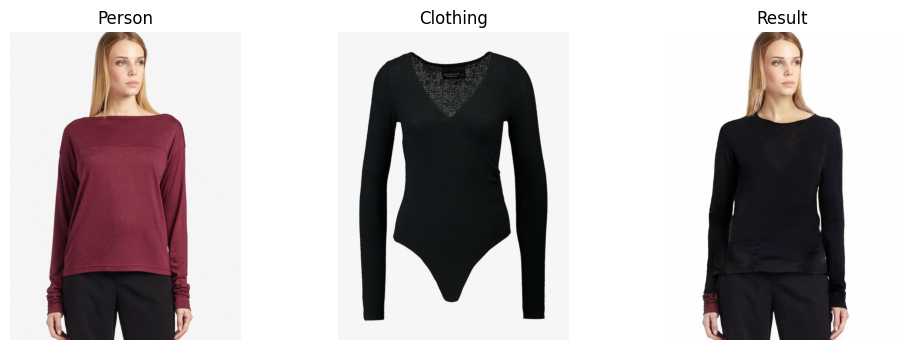

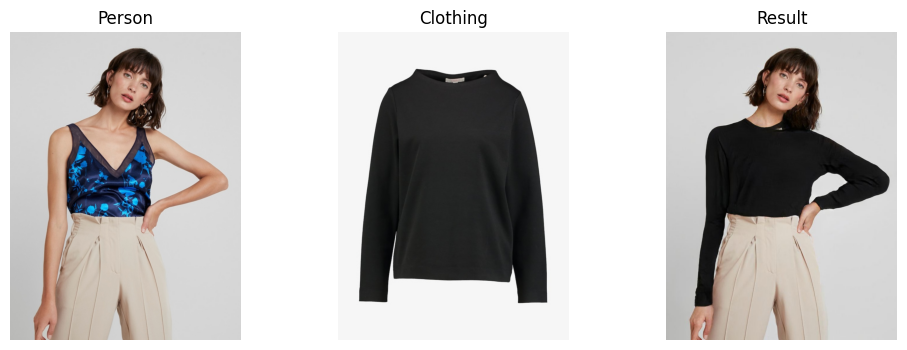

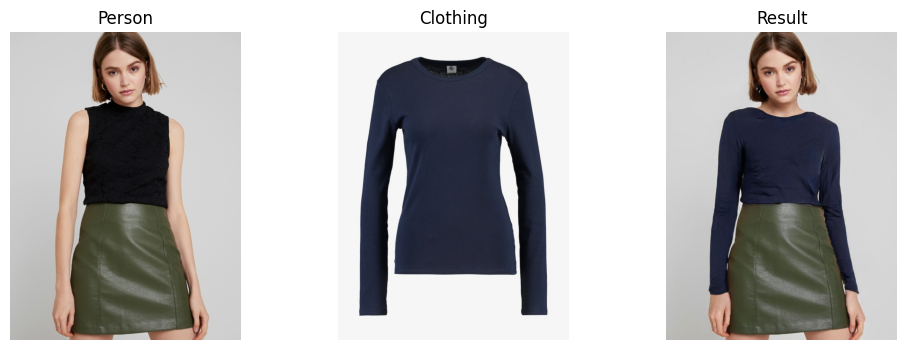

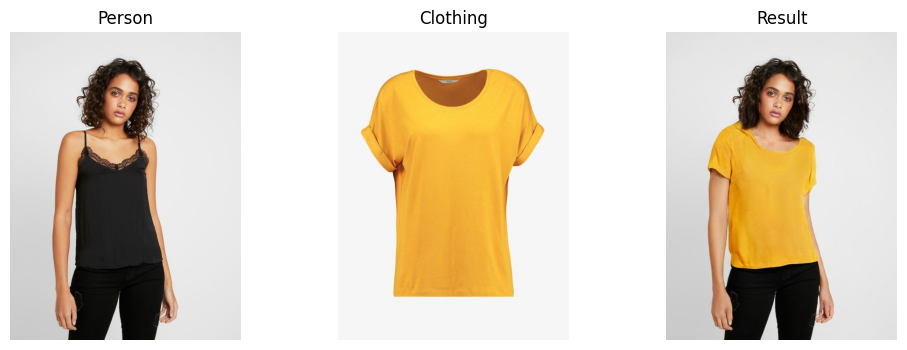

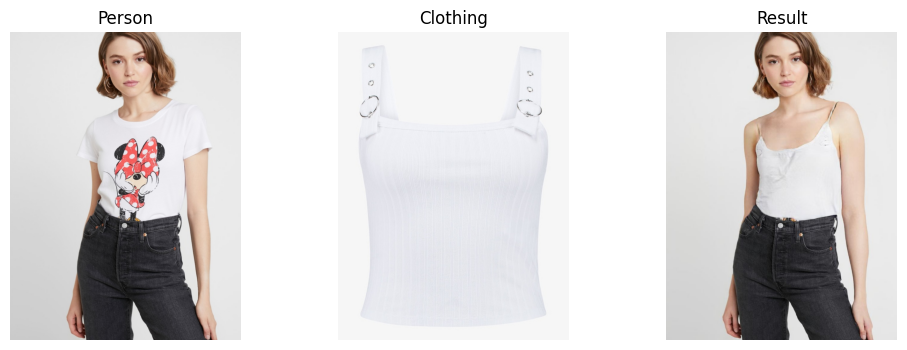

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Paths
dataset_path = "/content/datasets/test"
results_path = "/content/results/viton_test"

# Read test_pairs.txt
test_pairs_file = os.path.join(dataset_path, "test_pairs.txt")
with open(test_pairs_file, "r") as f:
    pairs = [line.strip().split() for line in f.readlines()]

# Function to remove "_00" only if it's at the end of the filename
def clean_filename(filename):
    if filename.endswith("_00.jpg"):
        return filename[:-7] + ".jpg"  # Remove only the last "_00"
    return filename  # Keep original if not ending in "_00"

# Function to load images safely
def load_image(path):
    if os.path.exists(path):
        return cv2.imread(path)[:, :, ::-1]  # Convert BGR to RGB
    else:
        return None

# Show multiple results
num_images_to_show = 5  # Change this to see more
count = 0

for person_img, cloth_img in pairs:
    # Remove "_00" only if it's at the end
    person_clean = clean_filename(person_img)
    cloth_clean = clean_filename(cloth_img)

    # Construct correct result filename: person_cloth_00.jpg
    result_filename = f"{person_clean.replace('.jpg', '')}_{cloth_clean.replace('.jpg', '')}_00.jpg"
    result_path = os.path.join(results_path, result_filename)

    # Define paths for person and cloth
    person_path = os.path.join(dataset_path, "image", person_img)
    cloth_path = os.path.join(dataset_path, "cloth", cloth_img)

    person = load_image(person_path)
    cloth = load_image(cloth_path)
    result = load_image(result_path)

    # Display only if all images exist
    if person is not None and cloth is not None and result is not None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        titles = ["Person", "Clothing", "Result"]
        images = [person, cloth, result]

        for ax, img, title in zip(axes, images, titles):
            ax.imshow(img)
            ax.set_title(title)
            ax.axis("off")

        plt.show()
        count += 1

    if count >= num_images_to_show:
        break  # Stop after showing num_images_to_show



In [ ]:
!pip install pytorch-fid


In [ ]:
!python -m pytorch_fid /content/results/viton_test /content/datasets/test/image


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 113MB/s]
100% 59/59 [01:02<00:00,  1.05s/it]
100% 41/41 [00:41<00:00,  1.01s/it]
FID:  11.401871696800384


In [ ]:
!pip install lpips
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import lpips
import torch
import cv2
import os
import numpy as np

# Initialize LPIPS model
lpips_model = lpips.LPIPS(net='alex').cuda()

# Paths
generated_dir = "/content/results/viton_test"
real_dir = "/content/datasets/test/image"

# Get sorted image lists (only JPG files)
gen_images = sorted([f for f in os.listdir(generated_dir) if f.endswith('.jpg')])
real_images = sorted([f for f in os.listdir(real_dir) if f.endswith('.jpg')])

# Create a mapping for real images (removing middle part)
real_image_dict = {img.split("_")[0]: img for img in real_images}

# Compute LPIPS for matched images
lpips_scores = []

print("🔍 Calculating LPIPS for each image pair...\n")

for idx, gen_img_name in enumerate(gen_images):
    gen_base_name = gen_img_name.split("_")[0]  # Extract base ID (e.g., "00006")

    if gen_base_name not in real_image_dict:
        print(f"[{idx}] Skipping {gen_img_name}: No matching real image found for {gen_base_name}.")
        continue

    gen_img_path = os.path.join(generated_dir, gen_img_name)
    real_img_path = os.path.join(real_dir, real_image_dict[gen_base_name])

    # Load images
    gen_img = cv2.imread(gen_img_path)
    real_img = cv2.imread(real_img_path)

    if gen_img is None or real_img is None:
        print(f"[{idx}] Skipping {gen_img_name}: Image load error.")
        continue

    # Convert BGR to RGB and normalize to [-1, 1]
    gen_img = (torch.tensor(gen_img).permute(2, 0, 1).float() / 127.5) - 1
    real_img = (torch.tensor(real_img).permute(2, 0, 1).float() / 127.5) - 1

    # Add batch dimension and move to GPU
    gen_img = gen_img.unsqueeze(0).cuda()
    real_img = real_img.unsqueeze(0).cuda()

    # Compute LPIPS
    score = lpips_model(gen_img, real_img).item()
    lpips_scores.append(score)

    print(f"[{idx+1}/{len(gen_images)}] {gen_img_name} → LPIPS: {score:.4f}")

# Calculate average LPIPS
if lpips_scores:
    average_lpips = np.mean(lpips_scores)
    print(f"\n✅ Average LPIPS over {len(lpips_scores)} image pairs: {average_lpips:.4f}")
else:
    print("⚠️ No valid image pairs found for LPIPS calculation.")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
🔍 Calculating LPIPS for each image pair...

[1/2928] 00006_06396_00.jpg → LPIPS: 0.2298
[2/2928] 00008_00782_00.jpg → LPIPS: 0.2967
[3/2928] 00008_13102_00.jpg → LPIPS: 0.2480
[4/2928] 00013_07845_00.jpg → LPIPS: 0.0949
[5/2928] 00017_04664_00.jpg → LPIPS: 0.1648
[6/2928] 00034_06047_00.jpg → LPIPS: 0.2231
[7/2928] 00034_13912_00.jpg → LPIPS: 0.2096
[8/2928] 00035_03222_00.jpg → LPIPS: 0.2721
[9/2928] 00055_11351_00.jpg → LPIPS: 0.1570
[10/2928] 00057_11274_00.jpg → LPIPS: 0.2361
[11/2928] 00057_11528_00.jpg → LPIPS: 0.1644
[12/2928] 00064_03191_00.jpg → LPIPS: 0.3072
[13/2928] 00067_09946_00.jpg → LPIPS: 0.1801
[14/2928] 00069_07475_00.jpg → LPIPS: 0.1824
[15/2928] 00071_02151_00.jpg → LPIPS: 0.1885
[16/2928] 00074_13289_00.jpg → LPIPS: 0.1423
[17/2928] 00075_10404_00.jpg → LPIPS: 0.2251
[18/2928] 00084_00400_00.jpg → LPIPS: 0.2837
[19/2928] 00084_00782_00.jpg → LPIPS: 0.2853
[20/2928] 00094_07309_

In [ ]:
!pip install scikit-image

In [ ]:
import os
import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim

# Paths
generated_dir = "/content/results/viton_test"
real_dir = "/content/datasets/test/image"

# Load image lists
gen_images = sorted([f for f in os.listdir(generated_dir) if f.endswith('.jpg')])
real_images = sorted([f for f in os.listdir(real_dir) if f.endswith('.jpg')])

# Create mapping of real image filenames by ID
real_image_dict = {img.split("_")[0]: img for img in real_images}

# Compute SSIM
ssim_scores = []

for idx, gen_img_name in enumerate(gen_images):
    start_time = time.time()

    gen_base_name = gen_img_name.split("_")[0]

    if gen_base_name not in real_image_dict:
        print(f"[{idx}] Skipping {gen_img_name}: No match.")
        continue

    gen_img_path = os.path.join(generated_dir, gen_img_name)
    real_img_path = os.path.join(real_dir, real_image_dict[gen_base_name])

    gen_img = cv2.imread(gen_img_path)
    real_img = cv2.imread(real_img_path)

    if gen_img is None or real_img is None:
        print(f"[{idx}] Skipping {gen_img_name}: Image load error.")
        continue

    if gen_img.shape != real_img.shape:
        real_img = cv2.resize(real_img, (gen_img.shape[1], gen_img.shape[0]))

    gen_gray = cv2.cvtColor(gen_img, cv2.COLOR_BGR2GRAY)
    real_gray = cv2.cvtColor(real_img, cv2.COLOR_BGR2GRAY)

    score = ssim(gen_gray, real_gray, data_range=255)
    ssim_scores.append(score)

    end_time = time.time()
    print(f"[{idx+1}/{len(gen_images)}] SSIM: {score:.4f} | Time: {end_time - start_time:.2f}s")

# ⬇️ Average SSIM output
if ssim_scores:
    average_ssim = np.mean(ssim_scores)
    print(f"\n✅ Average SSIM over {len(ssim_scores)} images: {average_ssim:.4f}")
else:
    print("⚠️ No valid image pairs found for SSIM calculation.")

[1/2928] SSIM: 0.7864 | Time: 0.11s
[2/2928] SSIM: 0.8060 | Time: 0.09s
[3/2928] SSIM: 0.7868 | Time: 0.09s
[4/2928] SSIM: 0.8978 | Time: 0.09s
[5/2928] SSIM: 0.8319 | Time: 0.09s
[6/2928] SSIM: 0.7917 | Time: 0.09s
[7/2928] SSIM: 0.7982 | Time: 0.10s
[8/2928] SSIM: 0.7811 | Time: 0.09s
[9/2928] SSIM: 0.8213 | Time: 0.10s
[10/2928] SSIM: 0.7935 | Time: 0.10s
[11/2928] SSIM: 0.8546 | Time: 0.09s
[12/2928] SSIM: 0.7191 | Time: 0.09s
[13/2928] SSIM: 0.8770 | Time: 0.09s
[14/2928] SSIM: 0.8668 | Time: 0.09s
[15/2928] SSIM: 0.8421 | Time: 0.09s
[16/2928] SSIM: 0.8561 | Time: 0.10s
[17/2928] SSIM: 0.8195 | Time: 0.09s
[18/2928] SSIM: 0.7197 | Time: 0.09s
[19/2928] SSIM: 0.7342 | Time: 0.10s
[20/2928] SSIM: 0.7795 | Time: 0.09s
[21/2928] SSIM: 0.7600 | Time: 0.10s
[22/2928] SSIM: 0.7624 | Time: 0.10s
[23/2928] SSIM: 0.7441 | Time: 0.09s
[24/2928] SSIM: 0.9007 | Time: 0.09s
[25/2928] SSIM: 0.8867 | Time: 0.15s
[26/2928] SSIM: 0.7743 | Time: 0.15s
[27/2928] SSIM: 0.8263 | Time: 0.12s
[28/2928] 

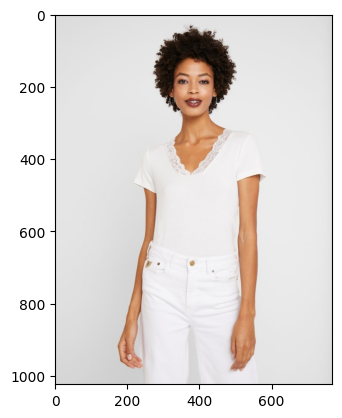

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/datasets/test/image/12379_00.jpg')
plt.imshow(img)
plt.show()
